In [62]:
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

images = load_images_from_folder('img')

stitcher = cv2.createStitcher() if imutils.is_cv3() else cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images)

if status == 0:
    cv2.imwrite("output_simple.jpeg", stitched)
    im = cv2.imread("output_simple.jpeg")
    
else:
	print("[INFO] image stitching failed ({})".format(status))




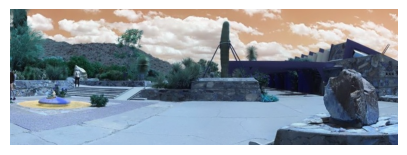

In [63]:
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

images = load_images_from_folder('img')

stitcher = cv2.createStitcher() if imutils.is_cv3() else cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images)

if status == 0:
    stitched = cv2.copyMakeBorder(stitched, 10, 10, 10, 10,
                                  cv2.BORDER_CONSTANT, (0, 0, 0))
 
    gray = cv2.cvtColor(stitched, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    mask = np.zeros(thresh.shape, dtype="uint8")
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)

    minRect = mask.copy()
    sub = mask.copy()
    while cv2.countNonZero(sub) > 0:
        minRect = cv2.erode(minRect, None)
        sub = cv2.subtract(minRect, thresh)

    cnts = cv2.findContours(minRect.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    (x, y, w, h) = cv2.boundingRect(c)
    stitched = stitched[y:y + h, x:x + w]

    cv2.imwrite("output.jpeg", stitched)
    im = cv2.imread("output.jpeg")
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.axis("off")
    plt.show()

else:
    print("[INFO] image stitching failed ({})".format(status))
